# DataPre-Processing & Feature Selection

## Importing Lib

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

## Data Loading 

In [2]:
df=pd.read_csv("male_players_20.csv")
pd.set_option("display.max_columns",None)


In [3]:
df.replace('[!@#\?]','',regex=True,inplace=True)

In [4]:
columns = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm',
           'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']
df[columns]

for colmun in columns:
    df[colmun] = df[colmun].str.split('+',expand=True)[0]

## Data Preprocessing

### 1. Handle Missing Values

In [5]:
pd.set_option('display.max_rows',None)
df.isnull().sum()

sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club                              0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur             1298
player_tags                   16779
team_position                   240
team_jersey_number              240
loaned_from                   17230
joined                      

In [6]:
columns_to_impute = ['release_clause_eur','contract_valid_until', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

for column in columns_to_impute:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

In [7]:
for column in columns_to_impute:
    missing_count = df[column].isnull().sum()
    print(f"{column}: {missing_count}")

release_clause_eur: 0
contract_valid_until: 0
pace: 0
shooting: 0
passing: 0
dribbling: 0
defending: 0
physic: 0


In [8]:
df["team_position"].mode()
df.loc[df["team_position"].isnull()==True,"team_position"]="SUB"

In [9]:
df["team_position"].value_counts()

team_position
SUB    8060
RES    2958
GK      662
RCB     660
LCB     660
RB      560
LB      560
ST      458
RCM     411
LCM     411
RM      399
LM      398
CAM     311
RDM     244
LDM     242
RS      195
LS      195
CDM     181
LW      162
RW      161
CB      100
CM       76
RWB      58
LWB      58
RAM      23
LAM      23
RF       19
LF       19
CF       14
Name: count, dtype: int64

In [10]:
df.loc[df["team_position"]=="CF","team_position"]=0
df.loc[df["team_position"]=="LF","team_position"]=1
df.loc[df["team_position"]=="RF","team_position"]=2
df.loc[df["team_position"]=="LAM","team_position"]=3
df.loc[df["team_position"]=="RAM","team_position"]=4
df.loc[df["team_position"]=="LWB","team_position"]=5
df.loc[df["team_position"]=="RWB","team_position"]=6
df.loc[df["team_position"]=="CM","team_position"]=7
df.loc[df["team_position"]=="CB","team_position"]=8
df.loc[df["team_position"]=="RW","team_position"]=9
df.loc[df["team_position"]=="LW","team_position"]=10
df.loc[df["team_position"]=="CDM","team_position"]=11
df.loc[df["team_position"]=="LS","team_position"]=12
df.loc[df["team_position"]=="RS","team_position"]=13
df.loc[df["team_position"]=="LDM","team_position"]=14
df.loc[df["team_position"]=="RDM","team_position"]=15
df.loc[df["team_position"]=="CAM","team_position"]=16
df.loc[df["team_position"]=="LM","team_position"]=17
df.loc[df["team_position"]=="RM","team_position"]=18
df.loc[df["team_position"]=="LCM","team_position"]=19
df.loc[df["team_position"]=="RCM","team_position"]=20
df.loc[df["team_position"]=="ST","team_position"]=21
df.loc[df["team_position"]=="LB","team_position"]=22
df.loc[df["team_position"]=="RB","team_position"]=23
df.loc[df["team_position"]=="LCB","team_position"]=24
df.loc[df["team_position"]=="RCB","team_position"]=25
df.loc[df["team_position"]=="GK","team_position"]=26
df.loc[df["team_position"]=="RES","team_position"]=27
df.loc[df["team_position"]=="SUB","team_position"]=28

### 2. Handle Outliers

In [11]:
num_df=df.select_dtypes(include=["int64","float64"])
num_df.columns

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positionin

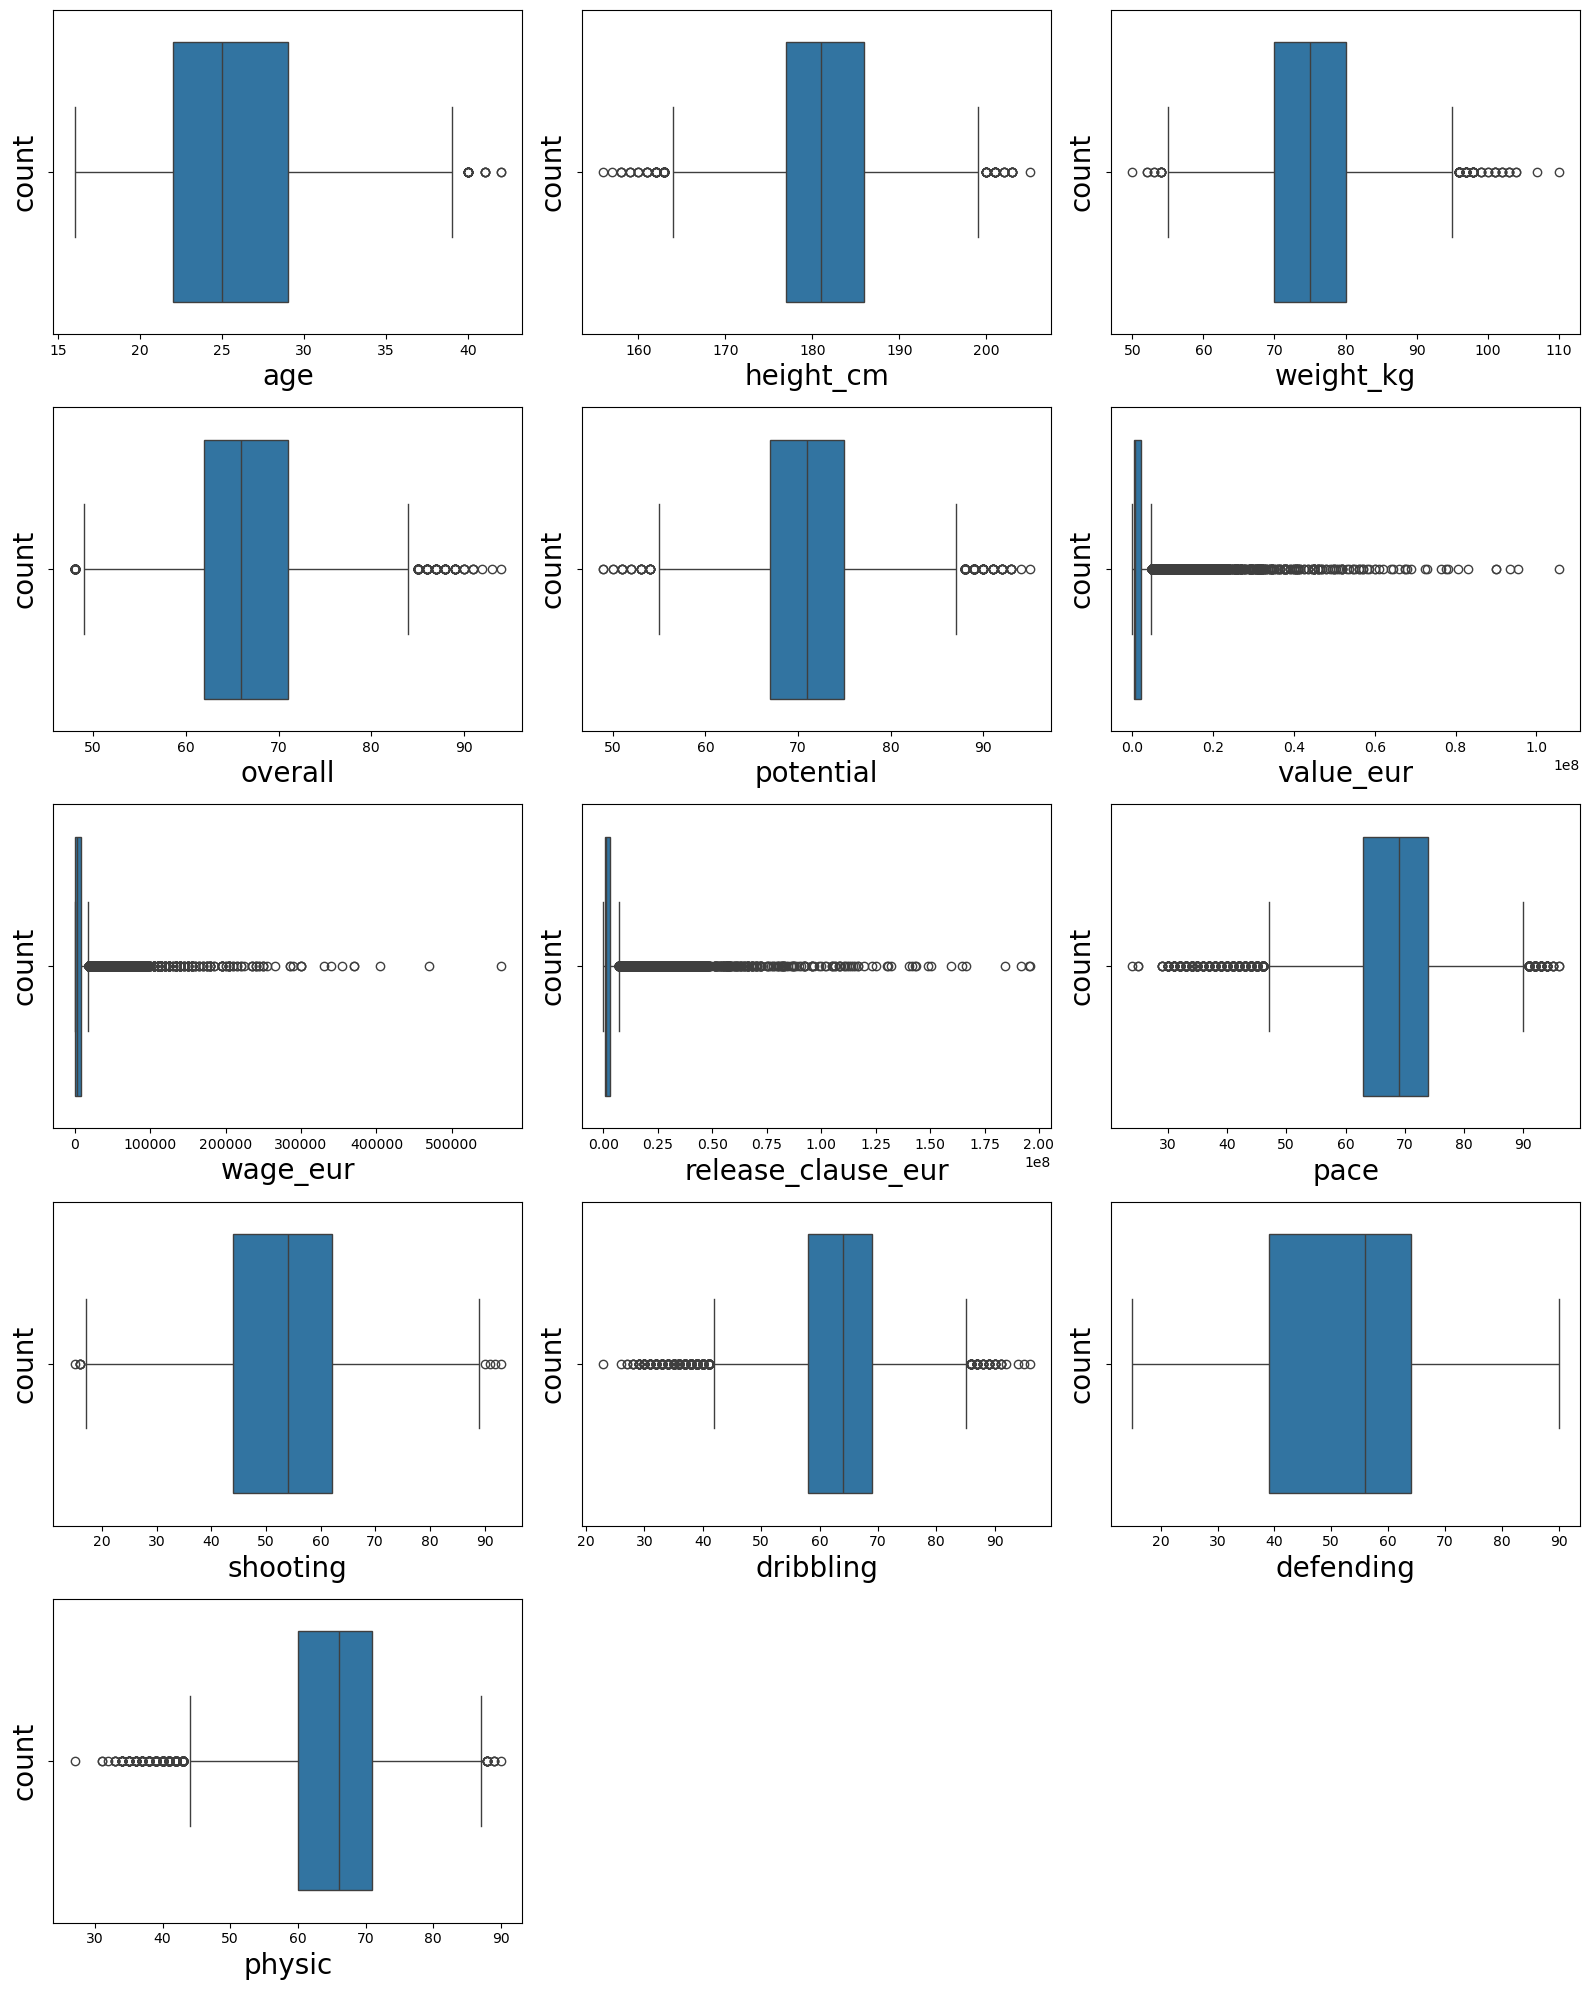

In [12]:
outlier_check = ['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur','pace',
           'shooting','dribbling','defending','physic']

plt.figure(figsize=(16,20),facecolor="white")
plotnumber=1

for column in outlier_check:
    if plotnumber<=len(num_df):
        plt.subplot(5,3,plotnumber)
        sns.boxplot(x=df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel("count",fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [13]:
# Age
Q1=df["age"].quantile(0.25)
Q3=df["age"].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [14]:
df.loc[df["age"]>upper_limit]
len(df.loc[df["age"]>upper_limit])/len(df)
df.loc[df["age"]>upper_limit,"age"]=df["age"].median()

In [15]:
df.loc[df["age"]<lower_limit]

Empty DataFrame
Columns: [sofifa_id, player_url, short_name, long_name, age, dob, height_cm, weight_kg, nationality, club, overall, potential, value_eur, wage_eur, player_positions, preferred_foot, international_reputation, weak_foot, skill_moves, work_rate, body_type, real_face, release_clause_eur, player_tags, team_position, team_jersey_number, loaned_from, joined, contract_valid_until, nation_position, nation_jersey_number, pace, shooting, passing, dribbling, defending, physic, gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed, gk_positioning, player_traits, attacking_crossing, attacking_finishing, attacking_heading_accuracy, attacking_short_passing, attacking_volleys, skill_dribbling, skill_curve, skill_fk_accuracy, skill_long_passing, skill_ball_control, movement_acceleration, movement_sprint_speed, movement_agility, movement_reactions, movement_balance, power_shot_power, power_jumping, power_stamina, power_strength, power_long_shots, mentality_aggression, mentality_interceptions, mentality_positioning, mentality_vision, mentality_penalties, mentality_composure, defending_marking, defending_standing_tackle, defending_sliding_tackle, goalkeeping_diving, goalkeeping_handling, goalkeeping_kicking, goalkeeping_positioning, goalkeeping_reflexes, ls, st, rs, lw, lf, cf, rf, rw, lam, cam, ram, lm, lcm, cm, rcm, rm, lwb, ldm, cdm, rdm, rwb, lb, ...]
Index: []

In [16]:
# Height
lower_limit=df["height_cm"].mean()-3*df["height_cm"].std()
upper_limit=df["height_cm"].mean()+3*df["height_cm"].std()

In [17]:
df.loc[df["height_cm"]>upper_limit]
len(df.loc[df["height_cm"]>upper_limit])/len(df)
df.loc[df["height_cm"]>upper_limit,"height_cm"]=df["height_cm"].median()

In [18]:
df.loc[df["height_cm"]<lower_limit]

sofifa_id                                         player_url  \
1352      221634  https://sofifa.com/player/221634/luciano-acost...   
1496      183895  https://sofifa.com/player/183895/maxi-moralez/...   
1923      170719  https://sofifa.com/player/170719/diego-buonano...   
3159      199940  https://sofifa.com/player/199940/juan-ezequiel...   
3898      202184  https://sofifa.com/player/202184/joao-plata/20...   
3946      214327  https://sofifa.com/player/214327/vladimir-hern...   
4243      234698  https://sofifa.com/player/234698/chanathip-son...   
4552      190629  https://sofifa.com/player/190629/daniel-villal...   
4829      237994  https://sofifa.com/player/237994/nahuel-barrio...   
6541      222970  https://sofifa.com/player/222970/erhun-oztumer...   
6789      235714  https://sofifa.com/player/235714/misael-doming...   
7648      232789  https://sofifa.com/player/232789/teruhito-naka...   
12549     237091  https://sofifa.com/player/237091/hyeon-wook-ki...   
14812     241963  https://sofifa.com/player/241963/hamed-al-gham...   
15878     241046  https://sofifa.com/player/241046/jonas-romero/...   
16929     247822  https://sofifa.com/player/247822/josh-nisbet/2...   

           short_name                         long_name  age         dob  \
1352        L. Acosta           Luciano Federico Acosta   25  1994-05-31   
1496       M. Moralez         Maximiliano Nicol Moralez   32  1987-02-27   
1923    D. Buonanotte      Diego Mario Buonanotte Rende   31  1988-04-19   
3159        J. Cuevas              Juan Ezequiel Cuevas   31  1988-06-04   
3898         J. Plata           João Jimmy Plata Cotera   27  1992-03-01   
3946     V. Hernández  Vladimir Javier Hernández Rivero   30  1989-04-23   
4243    C. Songkrasin              Chanathip Songkrasin   25  1993-10-05   
4552      D. Villalva   Daniel Alberto Villalba Barrios   26  1992-07-06   
4829       N. Barrios           Cristian Nahuel Barrios   21  1998-05-07   
6541       E. Oztumer                     Erhun Oztumer   28  1991-05-29   
6789     M. Domínguez   Josué Misael Domínguez González   19  1999-10-27   
7648      T. Nakagawa                             仲川 輝人   26  1992-07-27   
12549  Kim Hyeon Wook                           김현욱 金贤旭   24  1995-06-22   
14812    H. Al Ghamdi                   Hamed Al Ghamdi   20  1999-04-02   
15878       J. Romero                      Jonás Romero   18  2000-08-21   
16929       J. Nisbet                       Josh Nisbet   20  1999-06-15   

       height_cm  weight_kg     nationality                         club  \
1352         161         61       Argentina                    DC United   
1496         158         56       Argentina             New York City FC   
1923         161         57       Argentina         Universidad Católica   
3159         161         63       Argentina   CD Everton de Viña del Mar   
3898         157         71         Ecuador               Real Salt Lake   
3946         160         61        Colombia            Atlético Nacional   
4243         158         56        Thailand   Hokkaido Consadole Sapporo   
4552         159         62       Argentina  Tiburones Rojos de Veracruz   
4829         156         58       Argentina       San Lorenzo de Almagro   
6541         160         60         England            Charlton Athletic   
6789         159         58          Mexico                    Cruz Azul   
7648         161         57           Japan          Yokohama F. Marinos   
12549        160         61  Korea Republic                   Gangwon FC   
14812        161         59    Saudi Arabia                   Ettifaq FC   
15878        159         59       Argentina             Atlético Tucumán   
16929        158         58       Australia       Central Coast Mariners   

       overall  potential  value_eur  wage_eur player_positions  \
1352        76         80   10000000      9000          CAM, LM   
1496        76         76    6000000      9000          CAM, CM   
1923        

In [19]:
# Weight
lower_limit=df["weight_kg"].mean()-3*df["weight_kg"].std()
upper_limit=df["weight_kg"].mean()+3*df["weight_kg"].std()

In [20]:
df.loc[df["weight_kg"]>upper_limit]
len(df.loc[df["weight_kg"]>upper_limit])/len(df)
df.loc[df["weight_kg"]>upper_limit,"weight_kg"]=df["weight_kg"].median()

In [21]:
df.loc[df["weight_kg"]<lower_limit]
len(df.loc[df["weight_kg"]<lower_limit])/len(df)
df.loc[df["weight_kg"]<lower_limit,"weight_kg"]=df["weight_kg"].median()

In [22]:
# Overall
lower_limit=df["overall"].mean()-3*df["overall"].std()
upper_limit=df["overall"].mean()+3*df["overall"].std()

In [23]:
df.loc[df["overall"]>upper_limit]
len(df.loc[df["overall"]>upper_limit])/len(df)
df.loc[df["overall"]>upper_limit,"overall"]=df["overall"].median()

In [24]:
df.loc[df["overall"]<lower_limit]

Empty DataFrame
Columns: [sofifa_id, player_url, short_name, long_name, age, dob, height_cm, weight_kg, nationality, club, overall, potential, value_eur, wage_eur, player_positions, preferred_foot, international_reputation, weak_foot, skill_moves, work_rate, body_type, real_face, release_clause_eur, player_tags, team_position, team_jersey_number, loaned_from, joined, contract_valid_until, nation_position, nation_jersey_number, pace, shooting, passing, dribbling, defending, physic, gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed, gk_positioning, player_traits, attacking_crossing, attacking_finishing, attacking_heading_accuracy, attacking_short_passing, attacking_volleys, skill_dribbling, skill_curve, skill_fk_accuracy, skill_long_passing, skill_ball_control, movement_acceleration, movement_sprint_speed, movement_agility, movement_reactions, movement_balance, power_shot_power, power_jumping, power_stamina, power_strength, power_long_shots, mentality_aggression, mentality_interceptions, mentality_positioning, mentality_vision, mentality_penalties, mentality_composure, defending_marking, defending_standing_tackle, defending_sliding_tackle, goalkeeping_diving, goalkeeping_handling, goalkeeping_kicking, goalkeeping_positioning, goalkeeping_reflexes, ls, st, rs, lw, lf, cf, rf, rw, lam, cam, ram, lm, lcm, cm, rcm, rm, lwb, ldm, cdm, rdm, rwb, lb, ...]
Index: []

In [25]:
# Potential
lower_limit=df["potential"].mean()-3*df["potential"].std()
upper_limit=df["potential"].mean()+3*df["potential"].std()

In [26]:
df.loc[df["potential"]>upper_limit]
len(df.loc[df["potential"]>upper_limit])/len(df)
df.loc[df["potential"]>upper_limit,"potential"]=df["potential"].median()

In [27]:
df.loc[df["potential"]<lower_limit]
len(df.loc[df["potential"]<lower_limit])/len(df)
df.loc[df["potential"]<lower_limit,"potential"]=df["potential"].median()

In [28]:
# Value_Eur
Q1=df["value_eur"].quantile(0.25)
Q3=df["value_eur"].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [29]:
df.loc[df["value_eur"]>upper_limit,"value_eur"]=df["value_eur"].median()

In [30]:
# Wage_Eur
Q1=df["wage_eur"].quantile(0.25)
Q3=df["wage_eur"].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [31]:
df.loc[df["wage_eur"]>upper_limit,"wage_eur"]=df["wage_eur"].median()

In [32]:
# Release_Clause_Eur
Q1=df["release_clause_eur"].quantile(0.25)
Q3=df["release_clause_eur"].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [33]:
df.loc[df["release_clause_eur"]>upper_limit,"release_clause_eur"]=df["release_clause_eur"].median()

In [34]:
# Pace
Q1=df["pace"].quantile(0.25)
Q3=df["pace"].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [35]:
df.loc[df["pace"]>upper_limit,"pace"]=df["pace"].median()

In [36]:
df.loc[df["pace"]<lower_limit,"pace"]=df["pace"].median()

In [37]:
# Shooting
Q1=df["shooting"].quantile(0.25)
Q3=df["shooting"].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [38]:
df.loc[df["shooting"]>upper_limit,"shooting"]=df["shooting"].median()

In [39]:
df.loc[df["shooting"]<lower_limit,"shooting"]=df["shooting"].median()

In [40]:
# Dribbling
Q1=df["dribbling"].quantile(0.25)
Q3=df["dribbling"].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [41]:
df.loc[df["dribbling"]>upper_limit,"dribbling"]=df["dribbling"].median()

In [42]:
df.loc[df["dribbling"]<lower_limit,"dribbling"]=df["dribbling"].median()

In [43]:
# Physic
Q1=df["physic"].quantile(0.25)
Q3=df["physic"].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [44]:
df.loc[df["physic"]>upper_limit,"physic"]=df["physic"].median()

In [45]:
df.loc[df["physic"]<lower_limit,"physic"]=df["physic"].median()

### 3. Scaling

In [46]:
scaler = MinMaxScaler() # Object Creation
df[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur','pace','shooting','passing','dribbling','defending','physic','attacking_crossing','attacking_crossing',
    'attacking_finishing','attacking_heading_accuracy','attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy','skill_fk_accuracy','skill_long_passing',
    'skill_ball_control','skill_ball_control','movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping',
    'power_stamina','power_strength','power_long_shots','mentality_aggression','mentality_interceptions','mentality_positioning','mentality_vision','mentality_penalties','mentality_composure','defending_marking',
    'defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning',
    'goalkeeping_reflexes']]=scaler.fit_transform(df[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur','pace','shooting','passing','dribbling','defending',
                'physic','attacking_crossing','attacking_crossing','attacking_finishing','attacking_heading_accuracy','attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy',
                'skill_fk_accuracy','skill_long_passing','skill_ball_control','skill_ball_control','movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions','movement_balance',
                'power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots','mentality_aggression','mentality_interceptions','mentality_positioning','mentality_vision','mentality_penalties',
                'mentality_composure','defending_marking','defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes']])

## Feature Selection

In [47]:
# Drop column
df.drop(['sofifa_id','player_url','short_name','long_name','dob','nationality','club','player_positions','body_type',
          'real_face','player_tags','team_jersey_number','loaned_from','joined','contract_valid_until','nation_position',
          'nation_jersey_number','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning',
          'player_traits','ls','st','rs','lw','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm',
          'cdm','rdm','rwb','lb','lcb','cb','rcb','rb','lf','work_rate'],axis=1,inplace=True)

In [48]:
df.head()

age  height_cm  weight_kg   overall  potential  value_eur  wage_eur  \
0  0.695652   0.311111   0.414634  0.461538   0.485714   0.148936  0.166667   
1  0.782609   0.688889   0.682927  0.461538   0.485714   0.148936  0.166667   
2  0.478261   0.422222   0.317073  0.461538   0.485714   0.148936  0.166667   
3  0.434783   0.711111   0.780488  0.461538   0.485714   0.148936  0.166667   
4  0.521739   0.422222   0.463415  0.461538   0.485714   0.148936  0.166667   

  preferred_foot  international_reputation  weak_foot  skill_moves  \
0           Left                         5          4            4   
1          Right                         5          4            5   
2          Right                         5          5            5   
3          Right                         3          3            1   
4          Right                         4          4            4   

   release_clause_eur team_position      pace  shooting   passing  dribbling  \
0             0.16749             9  0.930233  0.513889  1.000000   0.511628   
1             0.16749            10  1.000000  0.513889  0.852941   0.511628   
2             0.16749            16  0.511628  0.944444  0.926471   0.511628   
3             0.16749            26  0.511628  0.513889  0.500000   0.511628   
4             0.16749            10  0.511628  0.916667  0.911765   0.511628   

   defending    physic  attacking_crossing  attacking_finishing  \
0   0.320000  0.511628            0.943182             1.000000   
1   0.266667  0.790698            0.897727             0.989247   
2   0.226667  0.325581            0.931818             0.913978   
3   0.546667  0.511628            0.090909             0.096774   
4   0.266667  0.511628            0.863636             0.881720   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                    0.738636                 1.000000           0.977011   
1                    0.954545                 0.894118           0.965517   
2                    0.647727                 0.941176           0.965517   
3                    0.113636                 0.423529           0.114943   
4                    0.636364                 0.964706           0.919540   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0         1.000000     0.988636           1.000000            1.000000   
1         0.913978     0.852273           0.800000            0.821429   
2         0.989247     0.931818           0.922222            0.869048   
3         0.086022     0.079545           0.111111            0.380952   
4         0.978495     0.875000           0.833333            0.892857   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0            1.000000               0.929412               0.858824   
1            0.956044               0.905882               0.941176   
2            0.989011               0.964706               0.917647   
3            0.274725               0.364706               0.576471   
4            0.978022               0.964706               0.905882   

   movement_agility  movement_reactions  movement_balance  power_shot_power  \
0          0.964706            0.986667          0.976471          0.888889   
1          0.894118            1.000000          0.694118          1.000000   
2          1.000000            0.946667          0.847059          0.814815   
3          0.658824            0.893333          0.435294          0.555556   
4          0.988235            0.920000          0.964706          0.839506   

   power_jumping  power_stamina  power_strength  power_long_shots  \
0       0.644737       0.741176        0.623377          1.000000   
1       1.000000       0.858824        0.753247          0.988889   
2       0.552632       0.811765        0.376623          0.888889   
3       0.776316       0.341176        0.753247          0.088889   
4       0.486842       0.847059        0.558442          0.844444   

   

In [49]:
df.corr(numeric_only=True)


age  height_cm  weight_kg   overall  \
age                         1.000000   0.081527   0.235452  0.465864   
height_cm                   0.081527   1.000000   0.761361  0.039475   
weight_kg                   0.235452   0.761361   1.000000  0.152552   
overall                     0.465864   0.039475   0.152552  1.000000   
potential                  -0.263490  -0.003532  -0.015152  0.627097   
value_eur                   0.142250  -0.010171   0.037636  0.493308   
wage_eur                    0.202944  -0.004956   0.042738  0.436723   
international_reputation    0.256229   0.038110   0.089637  0.430952   
weak_foot                   0.073575  -0.174041  -0.126266  0.227001   
skill_moves                 0.048368  -0.428975  -0.347653  0.400069   
release_clause_eur          0.114721  -0.014760   0.027400  0.459720   
pace                       -0.066865  -0.324393  -0.271477  0.185539   
shooting                    0.223729  -0.167949  -0.073811  0.454217   
passing                     0.307110  -0.252587  -0.157084  0.627423   
dribbling                   0.142074  -0.303933  -0.217049  0.528645   
defending                   0.245395   0.227760   0.224683  0.303956   
physic                      0.377186   0.414050   0.488787  0.450812   
attacking_crossing          0.131588  -0.496801  -0.396813  0.389242   
attacking_finishing         0.081417  -0.375036  -0.288253  0.340176   
attacking_heading_accuracy  0.152861   0.012354   0.045315  0.347043   
attacking_short_passing     0.138975  -0.369628  -0.285739  0.500667   
attacking_volleys           0.145703  -0.349913  -0.257023  0.391418   
skill_dribbling             0.020202  -0.498546  -0.410770  0.370264   
skill_curve                 0.144368  -0.446474  -0.345002  0.414349   
skill_fk_accuracy           0.192785  -0.409050  -0.306692  0.387573   
skill_long_passing          0.186298  -0.333459  -0.256770  0.484486   
skill_ball_control          0.091421  -0.423163  -0.334986  0.455662   
movement_acceleration      -0.148685  -0.556810  -0.487599  0.184829   
movement_sprint_speed      -0.139604  -0.473436  -0.416543  0.197482   
movement_agility           -0.019292  -0.631788  -0.538547  0.251510   
movement_reactions          0.464164  -0.018360   0.089653  0.853624   
movement_balance           -0.087434  -0.788462  -0.662445  0.102933   
power_shot_power            0.263680  -0.173504  -0.055130  0.564405   
power_jumping               0.186644  -0.037997   0.036346  0.265493   
power_stamina               0.121439  -0.290027  -0.213267  0.370850   
power_strength              0.341862   0.535692   0.611305  0.361494   
power_long_shots            0.164404  -0.382987  -0.275824  0.424508   
mentality_aggression        0.262186  -0.043459   0.033739  0.402248   
mentality_interceptions     0.198412  -0.051660  -0.024492  0.318308   
mentality_positioning       0.089557  -0.443902  -0.351477  0.354726   
mentality_vision            0.196567  -0.370690  -0.279554  0.503855   
mentality_penalties         0.143113  -0.334462  -0.241954  0.344797   
mentality_composure         0.370763  -0.158472  -0.053030  0.713357   
defending_marking           0.159595  -0.075590  -0.045041  0.305642   
defending_standing_tackle   0.119605  -0.066914  -0.048658  0.253199   
defending_sliding_tackle    0.104207  -0.075484  -0.060439  0.223372   
goalkeeping_diving          0.106934   0.365417   0.334485 -0.017936   
goalkeeping_handling        0.109127   0.365151   0.336372 -0.018481   
goalkeeping_kicking         0.108808   0.362819   0.332871 -0.022103   
goalkeeping_positioning     0.117147   0.364922   0.337006 -0.011359   
goalkeeping_reflexes        0.108411   0.365307   0.335853 -0.017602   

                            potential  value_eur  wage_eur  \
age                         -0.263490   0.142250  0.202944   
height_cm                   -0.003532  -0.010171 -0.004956   
weight_kg                   -0.015152   0.037636  0.042738   
overall                      0.627097   

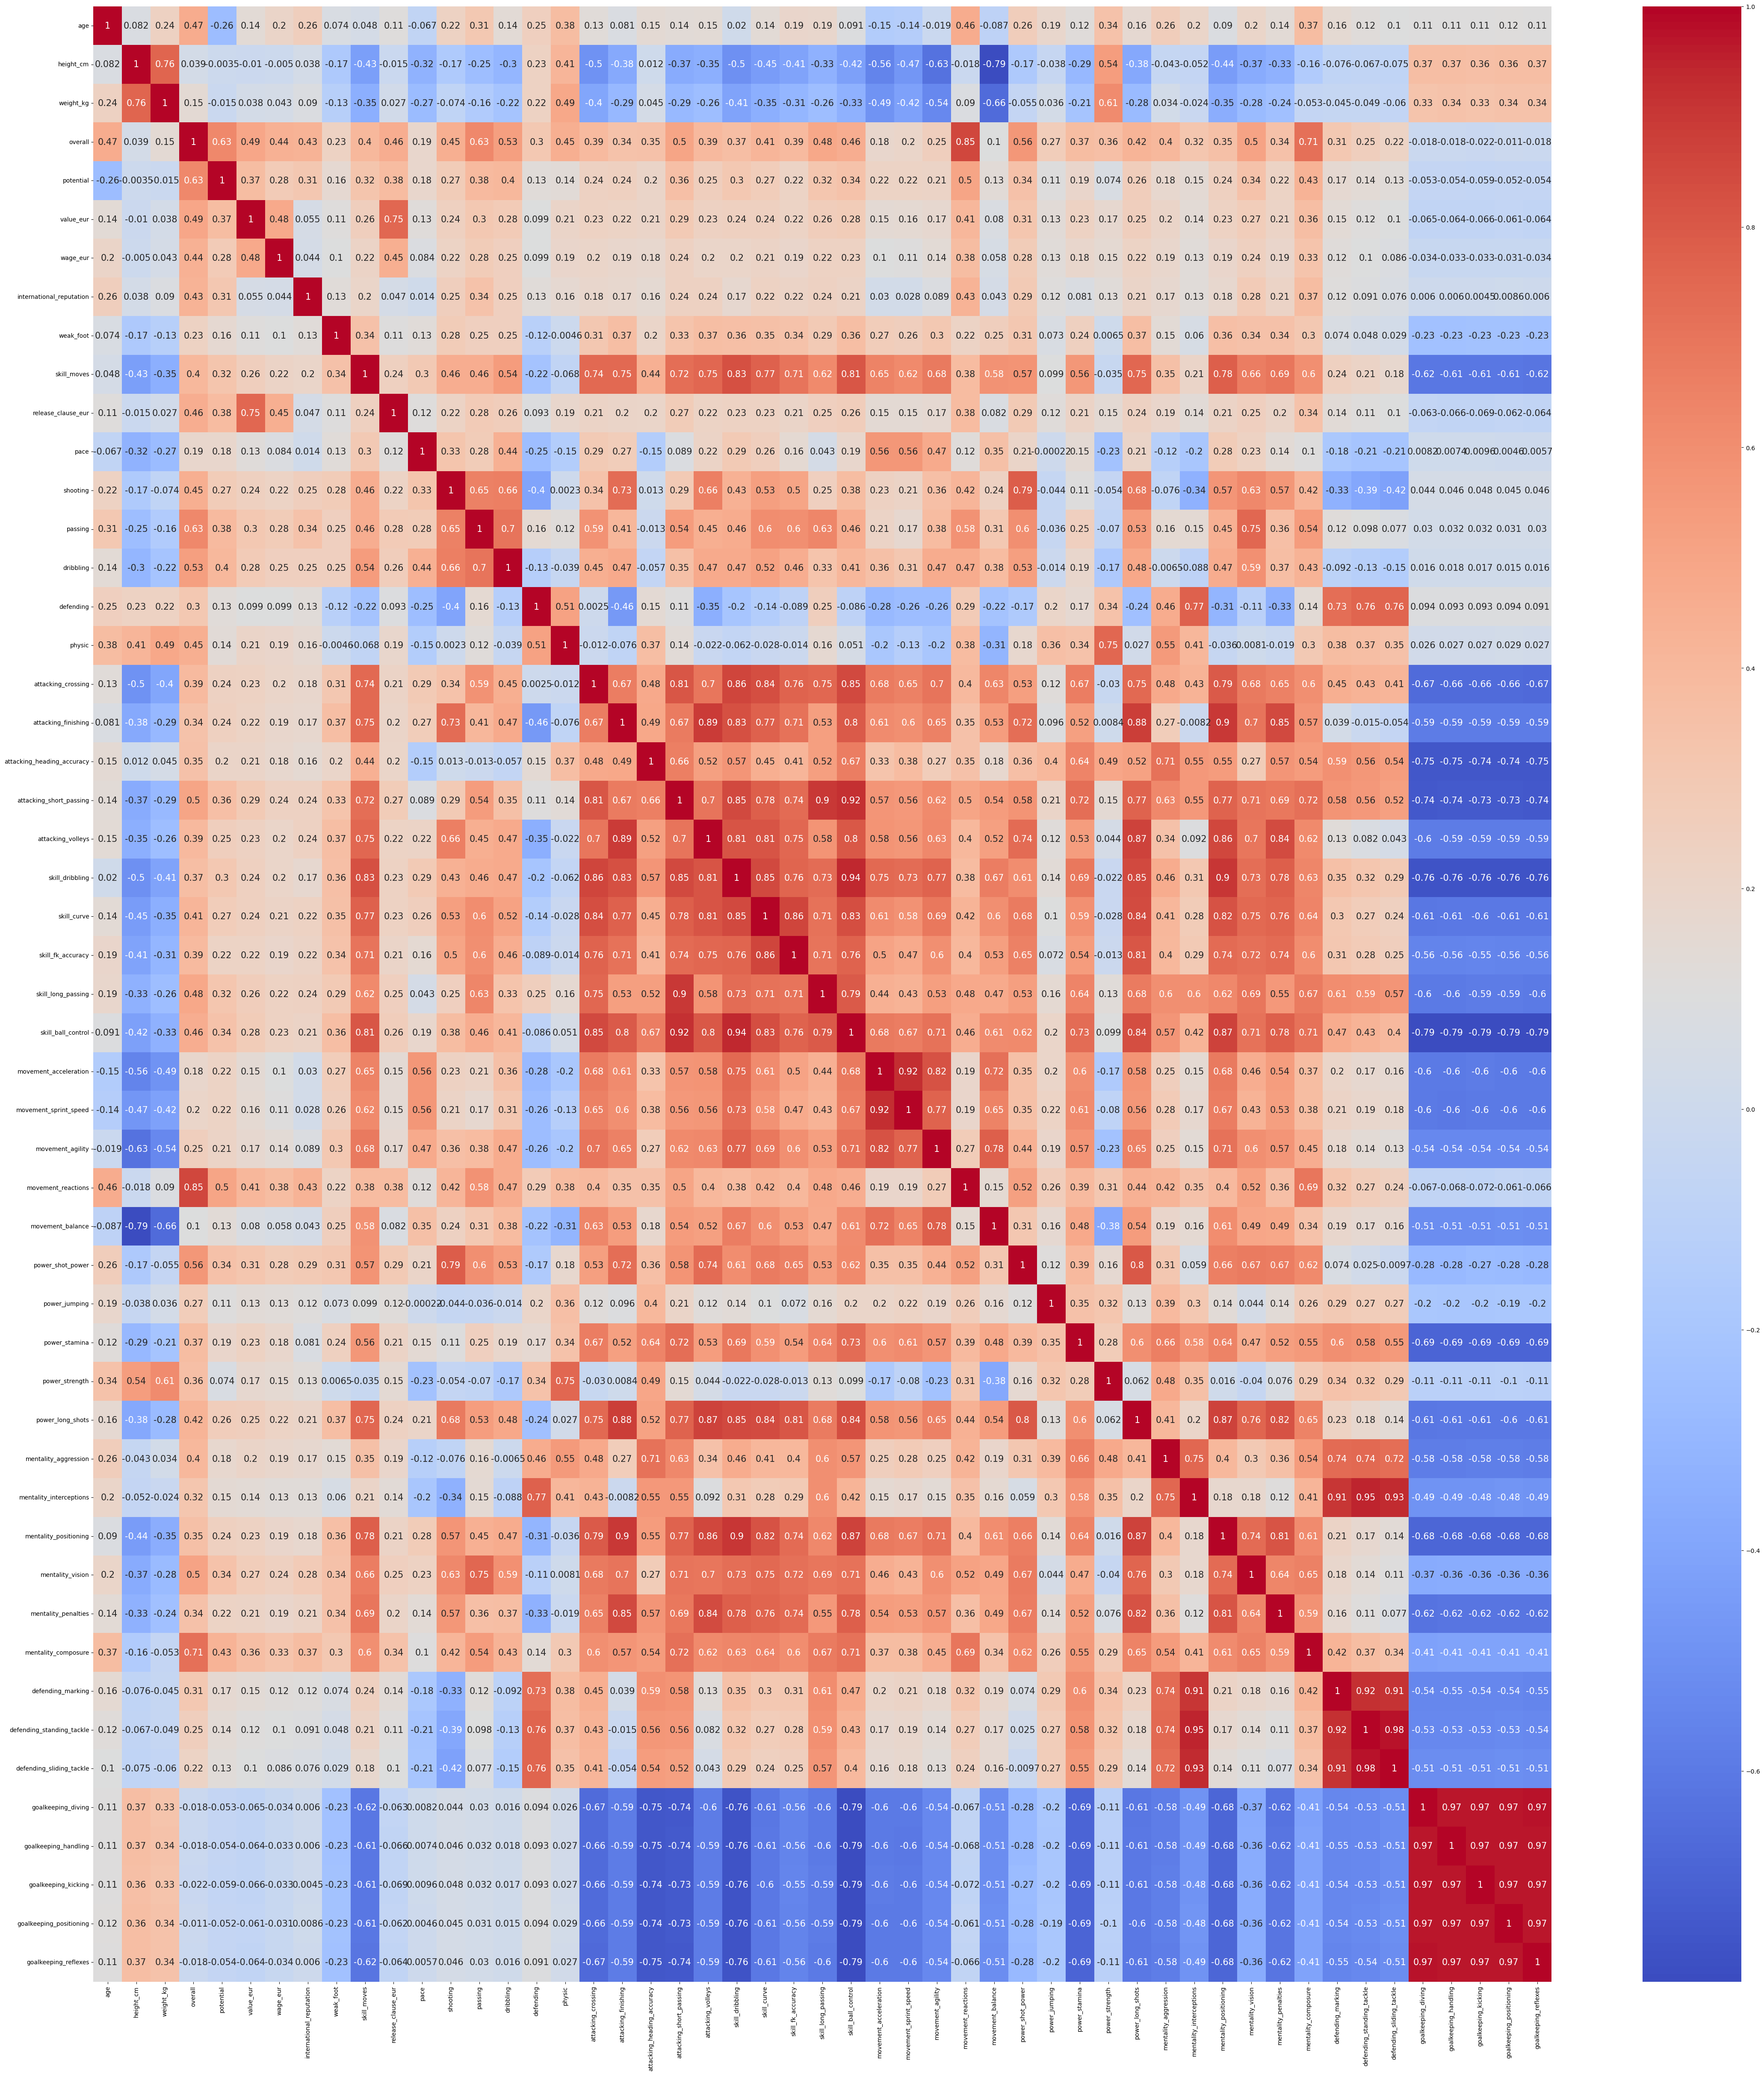

In [50]:
plt.figure(figsize=(55,60))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm",annot_kws={"size":15})
plt.show()

In [51]:
pd.set_option('display.max_rows',None)
corrmat = df.corr(numeric_only=True)
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9]
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

feature1                   feature2      corr
0   defending_standing_tackle   defending_sliding_tackle  0.975808
1    defending_sliding_tackle  defending_standing_tackle  0.975808
2          goalkeeping_diving       goalkeeping_reflexes  0.973922
3        goalkeeping_reflexes         goalkeeping_diving  0.973922
4          goalkeeping_diving       goalkeeping_handling  0.971330
5        goalkeeping_handling         goalkeeping_diving  0.971330
6        goalkeeping_reflexes       goalkeeping_handling  0.971244
7        goalkeeping_handling       goalkeeping_reflexes  0.971244
8     goalkeeping_positioning         goalkeeping_diving  0.971218
9          goalkeeping_diving    goalkeeping_positioning  0.971218
10    goalkeeping_positioning       goalkeeping_reflexes  0.971060
11       goalkeeping_reflexes    goalkeeping_positioning  0.971060
12       goalkeeping_handling    goalkeeping_positioning  0.970517
13    goalkeeping_positioning       goalkeeping_handling  0.970517
14       goalkeeping_reflexes        goalkeeping_kicking  0.967866
15        goalkeeping_kicking       goalkeeping_reflexes  0.967866
16         goalkeeping_diving        goalkeeping_kicking  0.967057
17        goalkeeping_kicking         goalkeeping_diving  0.967057
18        goalkeeping_kicking       goalkeeping_handling  0.966508
19       goalkeeping_handling        goalkeeping_kicking  0.966508
20    goalkeeping_positioning        goalkeeping_kicking  0.966061
21        goalkeeping_kicking    goalkeeping_positioning  0.966061
22    mentality_interceptions  defending_standing_tackle  0.945287
23  defending_standing_tackle    mentality_interceptions  0.945287
24         skill_ball_control            skill_dribbling  0.943461
25            skill_dribbling         skill_ball_control  0.943461
26    mentality_interceptions   defending_sliding_tackle  0.933894
27   defending_sliding_tackle    mentality_interceptions  0.933894
28      movement_sprint_speed      movement_acceleration  0.923721
29      movement_acceleration      movement_sprint_speed  0.923721
30          defending_marking  defending_standing_tackle  0.918593
31  defending_standing_tackle          defending_marking  0.918593
32    attacking_short_passing         skill_ball_control  0.917721
33         skill_ball_control    attacking_short_passing  0.917721
34          defending_marking   defending_sliding_tackle  0.909153
35   defending_sliding_tackle          defending_marking  0.909153
36    mentality_interceptions          defending_marking  0.907401
37          defending_marking    mentality_interceptions  0.907401
38      mentality_positioning            skill_dribbling  0.904501
39            skill_dribbling      mentality_positioning  0.904501

In [52]:
df.drop(['defending_standing_tackle','goalkeeping_diving','goalkeeping_handling',
           'goalkeeping_positioning','goalkeeping_reflexes','mentality_interceptions','skill_ball_control',
           'movement_sprint_speed','defending_marking','mentality_positioning','attacking_short_passing'],axis=1,inplace=True)

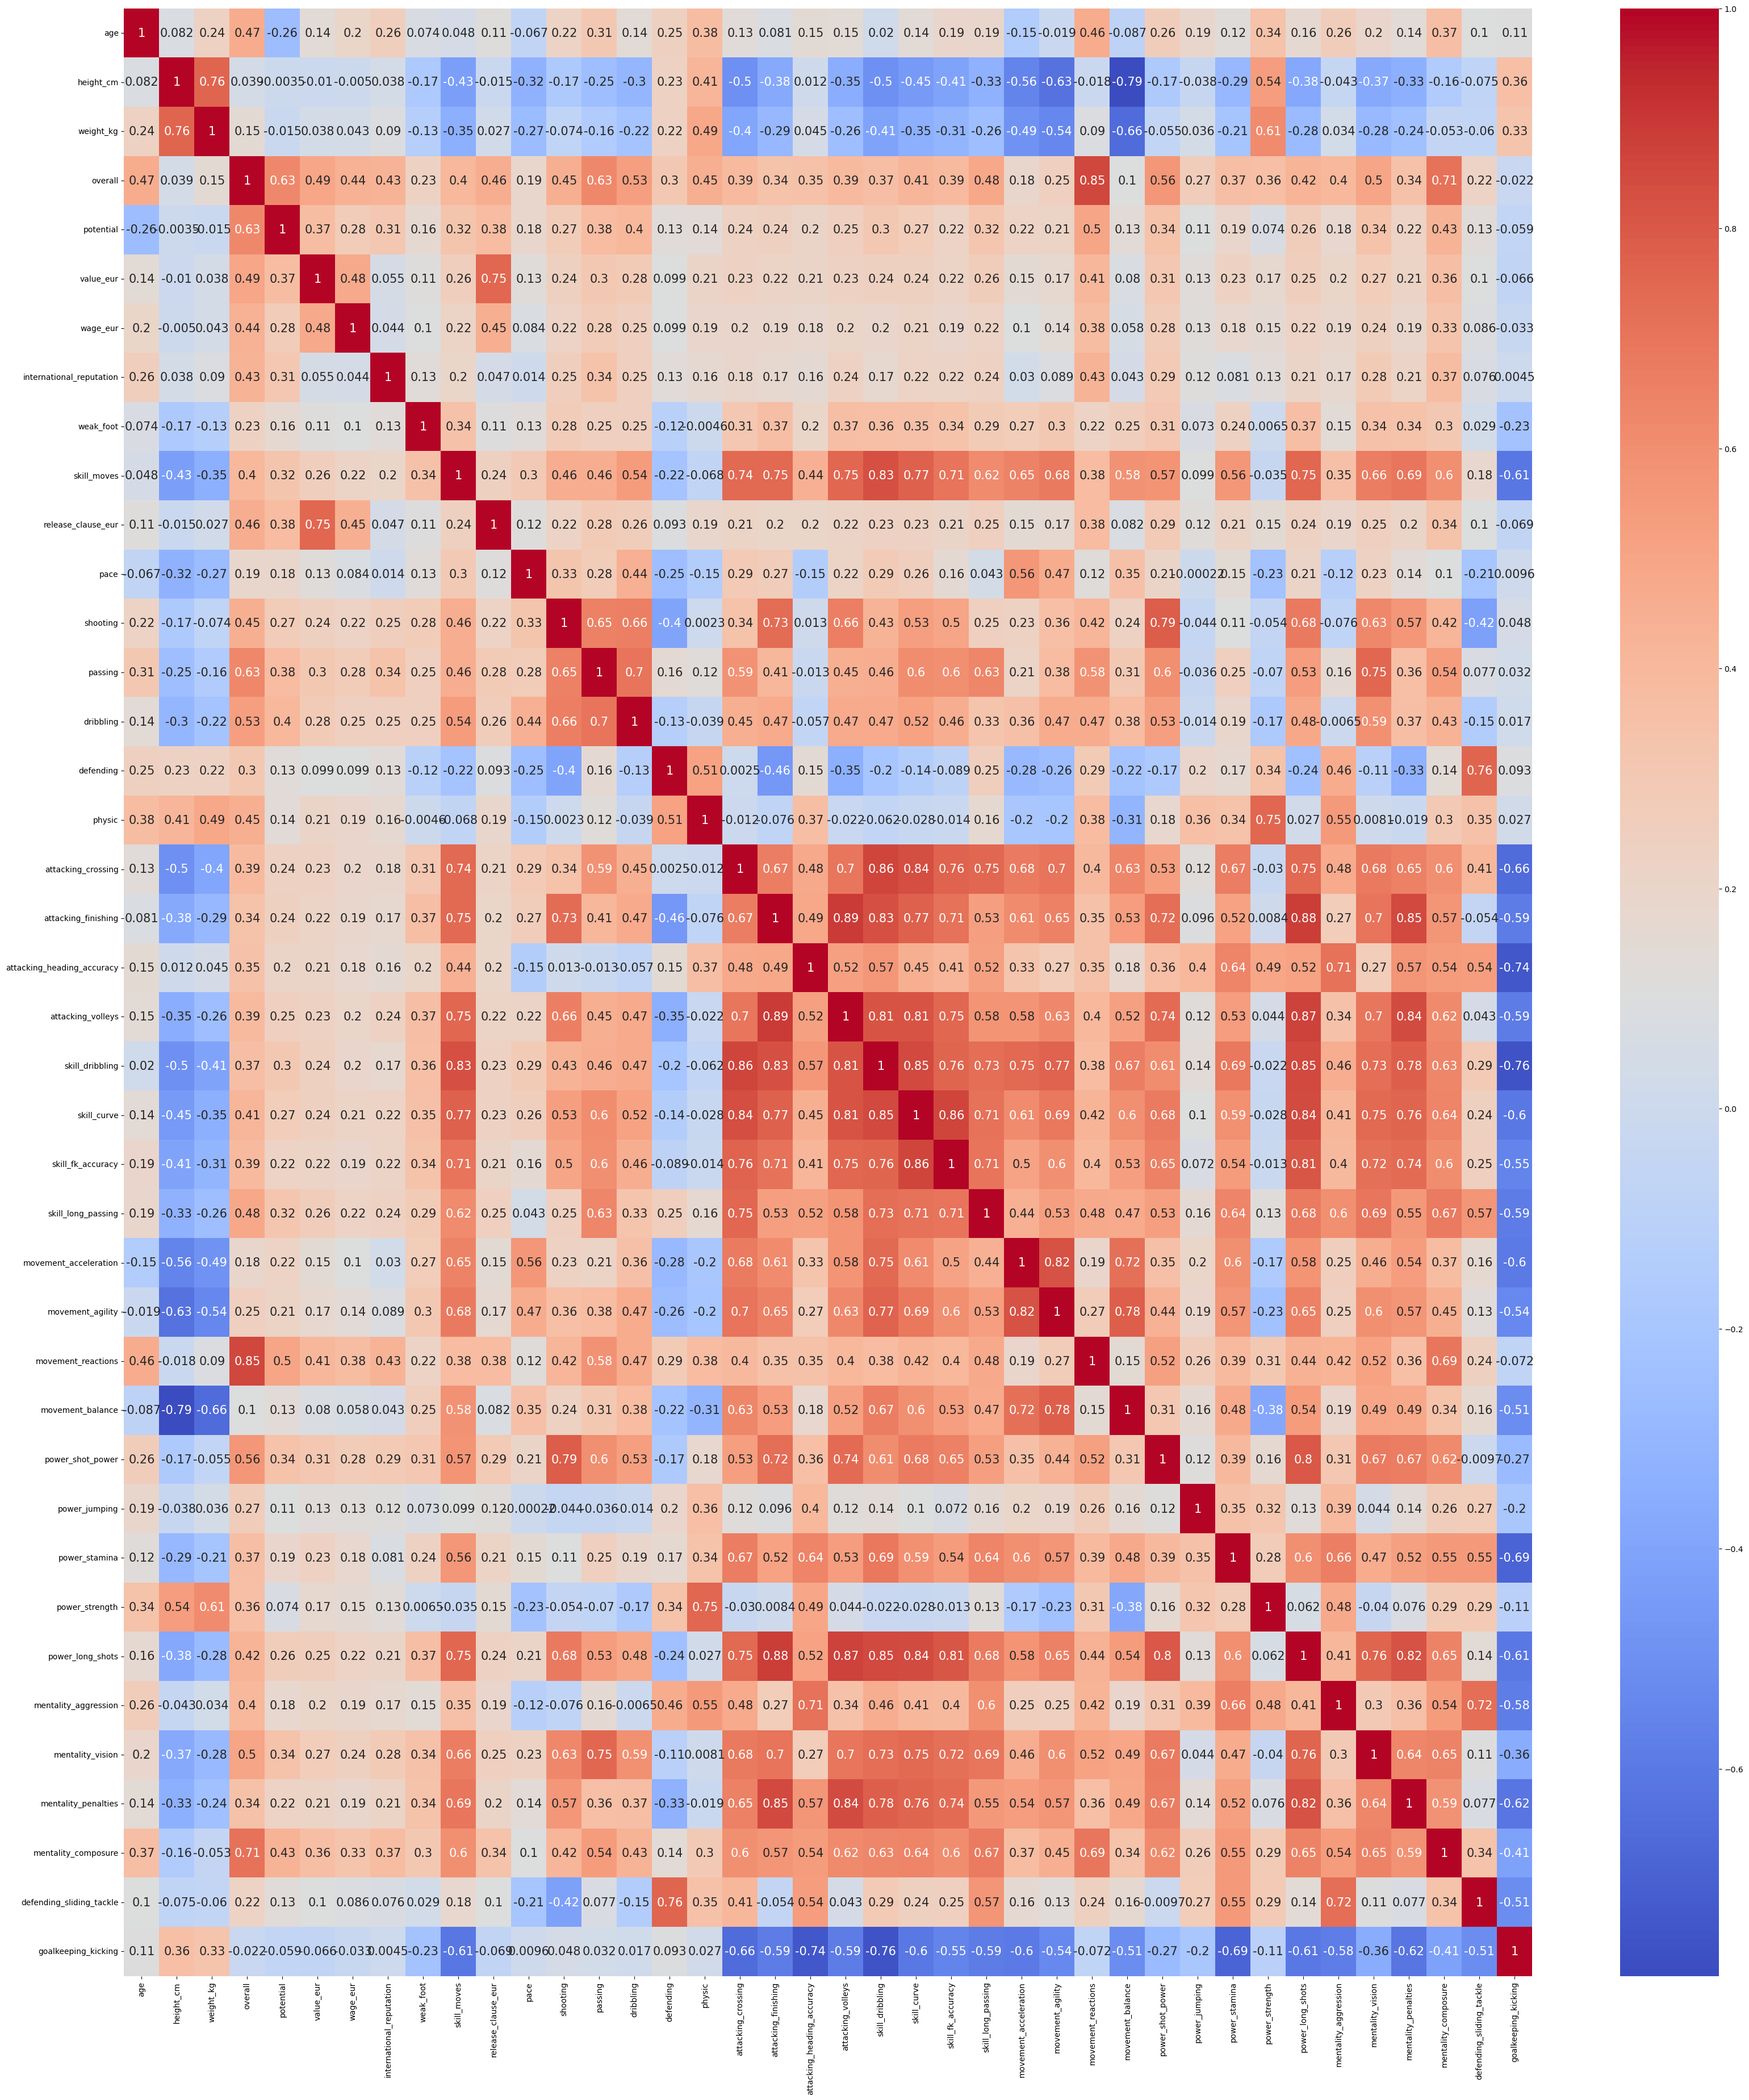

In [54]:
plt.figure(figsize=(40,45))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm",annot_kws={"size":15})
plt.show()